In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import seaborn as sns
import shutil

In [2]:
def load_dataframes(get_unique_images:bool, drop_without_callback, total):
    df_mass_train = pd.read_csv('../Data/CBIS-DDSM dataset/csv/mass_case_description_train_set.csv')
    df_mass_test = pd.read_csv('../Data/CBIS-DDSM dataset/csv/mass_case_description_test_set.csv')
    df_calc_train = pd.read_csv('../Data/CBIS-DDSM dataset/csv/calc_case_description_train_set.csv')
    df_calc_test = pd.read_csv('../Data/CBIS-DDSM dataset/csv/calc_case_description_test_set.csv')

    if get_unique_images:
        # get unique images
        df_calc_train = df_calc_train.drop_duplicates(subset='cropped image file path', keep='last').reset_index(drop=True)
        df_calc_test = df_calc_test.drop_duplicates(subset='cropped image file path', keep='last').reset_index(drop=True)
        df_mass_train = df_mass_train.drop_duplicates(subset='cropped image file path', keep='last').reset_index(drop=True)
        df_mass_test = df_mass_test.drop_duplicates(subset='cropped image file path', keep='last').reset_index(drop=True)

    if drop_without_callback:
        # drop benign without callback
        df_calc_train = df_calc_train[df_calc_train['pathology'] != 'BENIGN_WITHOUT_CALLBACK'].reset_index(drop=True)
        df_calc_test = df_calc_test[df_calc_test['pathology'] != 'BENIGN_WITHOUT_CALLBACK'].reset_index(drop=True)
        df_mass_train = df_mass_train[df_mass_train['pathology'] != 'BENIGN_WITHOUT_CALLBACK'].reset_index(drop=True)
        df_mass_test = df_mass_test[df_mass_test['pathology'] != 'BENIGN_WITHOUT_CALLBACK'].reset_index(drop=True)

    if total:
        return pd.concat([df_calc_train, df_calc_test]).reset_index(drop=True), pd.concat([df_mass_test, df_mass_train]).reset_index(drop=True)
    else:      
        return df_mass_train, df_mass_test, df_calc_train, df_calc_test

In [3]:
df_calc, df_mass = load_dataframes(get_unique_images=True, drop_without_callback=False, total=True)
df_mass

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1692,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1693,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1694,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [4]:
df_mass['pathology'].value_counts()

pathology
MALIGNANT                  784
BENIGN                     771
BENIGN_WITHOUT_CALLBACK    141
Name: count, dtype: int64

In [127]:
import os
from PIL import Image
import shutil

def move_masked_images(df, threshold=1):
    for i in range(len(df)):
        cropped = df['cropped image file path'][i].split("/")[2]
        masked = df['ROI mask file path'][i].split("/")[2]

        # The base directory for your dataset
        base_dir = '../CBIS-DDSM dataset clean copy/jpeg'
        # The base directory for masked images
        masked_dir_base = '../CBIS-DDSM dataset clean copy/masked'
        
        if masked == cropped:
            image_names = os.listdir(f'{base_dir}/{cropped}')
            for image_name in image_names:
                source_path = f'{base_dir}/{cropped}/{image_name}'
                if not os.path.isfile(source_path):
                    print(f"File not found: {source_path}")
                    continue
                img = Image.open(source_path)
                pixel_values = list(img.getdata())
                zero_pixel = 1
                nonzero_pixel = 1
                for pixel in pixel_values:
                    if pixel == 0:
                        zero_pixel += 1
                    else:
                        nonzero_pixel += 1

                pixel_ratio = nonzero_pixel / zero_pixel

                if pixel_ratio < threshold:
                    destination_dir = f'{masked_dir_base}/{cropped}'
                    os.makedirs(destination_dir, exist_ok=True)
                    destination_path = f'{destination_dir}/{image_name}'
                    shutil.move(source_path, destination_path)
        else:
            image_names = os.listdir(f'{base_dir}/{masked}')
            if not image_names:
                print(f"No images found in directory: {base_dir}/{masked}")
                continue
            image_name = image_names[0]
            source_path = f'{base_dir}/{masked}/{image_name}'
            if not os.path.isfile(source_path):
                print(f"File not found: {source_path}")
                continue
            destination_dir = f'{masked_dir_base}/{masked}'
            os.makedirs(destination_dir, exist_ok=True)
            destination_path = f'{destination_dir}/{image_name}'
            shutil.move(source_path, destination_path)

move_masked_images(df=df_mass)


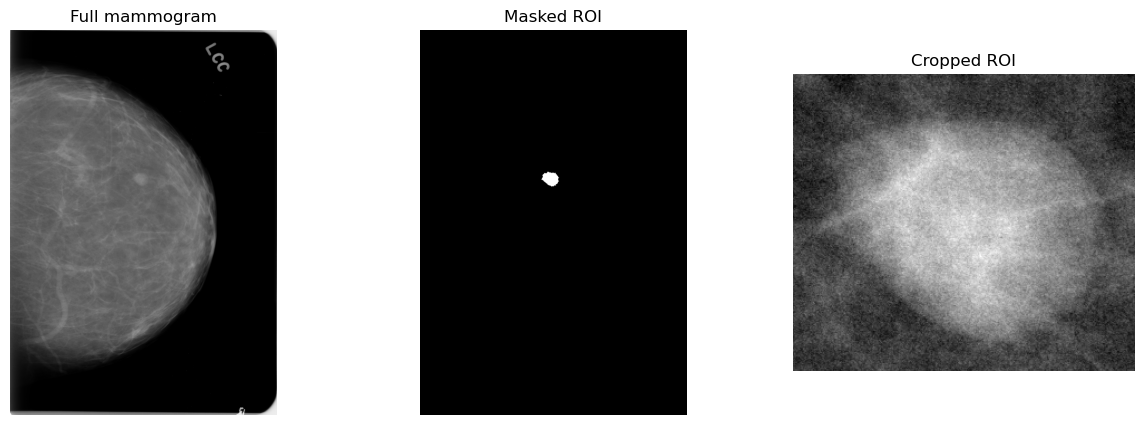

In [158]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from PIL import ImageEnhance

def show_images(df):
          # Adjust the figure size as needed
    for i in range(22,23):
        # Load the full mammogram image
        full_dir = df['image file path'][i].split("/")[2]
        full_name = os.listdir(f'../CBIS-DDSM dataset clean masked copy/jpeg/{full_dir}')[0]
        full_img = Image.open(f"../CBIS-DDSM dataset clean masked copy/jpeg/{full_dir}/{full_name}")

        # Load the binary mask image
        masked_dir = df['ROI mask file path'][i].split("/")[2]
        masked_name = os.listdir(f'../CBIS-DDSM dataset clean masked copy/masked/{masked_dir}')[0]
        masked_img = Image.open(f"../CBIS-DDSM dataset clean masked copy/masked/{masked_dir}/{masked_name}")

        cropped_dir = df['cropped image file path'][i].split("/")[2]
        cropped_name = os.listdir(f'../CBIS-DDSM dataset clean masked copy/jpeg/{cropped_dir}')[0]
        cropped_img = Image.open(f"../CBIS-DDSM dataset clean masked copy/jpeg/{cropped_dir}/{cropped_name}")

        # Plot each cropped masked image in a subplot
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1) 
        plt.imshow(full_img, cmap='gray')
        plt.title(f'Full mammogram')
        plt.axis('off')

        plt.subplot(1, 3, 2) 
        plt.imshow(masked_img, cmap='gray')
        plt.title(f'Masked ROI')
        plt.axis('off')

        plt.subplot(1, 3, 3) 
        plt.imshow(cropped_img, cmap='gray')
        plt.title(f'Cropped ROI')
        plt.axis('off')

        plt.savefig('../Figures/all_3_images.png', bbox_inches='tight', dpi=400)

        plt.show()

# Call the transform function
show_images(df=df_mass)



In [97]:
df_mass_train, df_mass_test, df_calc_train, df_calc_test = load_dataframes(get_unique_images=True, drop_without_callback=False, total=False)

In [98]:
df_mass_test

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,P_01825,2,RIGHT,MLO,1,mass,LOBULATED,MICROLOBULATED,3,BENIGN_WITHOUT_CALLBACK,3,Mass-Test_P_01825_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Mass-Test_P_01825_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Mass-Test_P_01825_RIGHT_MLO_1/1.3.6.1.4.1.9590...
374,P_01833,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,5,MALIGNANT,5,Mass-Test_P_01833_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Mass-Test_P_01833_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Mass-Test_P_01833_RIGHT_MLO_1/1.3.6.1.4.1.9590...
375,P_01865,2,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED,4,MALIGNANT,2,Mass-Test_P_01865_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_01865_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_01865_LEFT_MLO_1/1.3.6.1.4.1.9590....
376,P_01912,3,RIGHT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,4,Mass-Test_P_01912_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_01912_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_01912_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [99]:
df_mass_train

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [100]:
df_calc, df_mass = load_dataframes(get_unique_images=True, drop_without_callback=False, total=True)
df_mass

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,Mass-Test_P_00016_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,Mass-Test_P_00017_LEFT_MLO/1.3.6.1.4.1.9590.10...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,Mass-Test_P_00032_RIGHT_CC/1.3.6.1.4.1.9590.10...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1692,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1693,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1694,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [36]:
len(df_mass_train) * 0.225

257.85

In [56]:
upper_thres_size = 500
lower_thres_size = 200 
upper_thres_ratio = 1.20
lower_thres_ratio = 0.8

width_list = []
height_list = []
ratio_list = []
count_correct = 0
for i in range(len(df_mass_train)):
    img_dir_path = df_mass_train['cropped image file path'][i]
    img_dir_path = img_dir_path.split('/')
    img_dir_path = img_dir_path[2]

    image_name = os.listdir(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}')
    if len(image_name) > 0:
        img = Image.open(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}/{image_name[0]}')
        width, height = img.size
        ratio = width / height
        if not (lower_thres_size <= width <= upper_thres_size or lower_thres_size <= height <= upper_thres_size) \
            or not (lower_thres_ratio <= ratio <= upper_thres_ratio):
                width_list.append(width)
                height_list.append(height)
                ratio_list.append(ratio)
        else:
             count_correct += 1
        # if width > upper_thres or width < lower_thres and height > upper_thres or height < lower_thres:
        #     width_list.append(width)
        #     height_list.append(height)
print(count_correct, len(df_mass_train))
df_size = pd.DataFrame({'width': width_list,
                        'height': height_list,
                        'ratio': ratio_list})
df_size

802 1146


,width,height,ratio
0,194,185,1.048649
1,446,653,0.683002
2,594,763,0.778506
3,550,812,0.677340
4,330,268,1.231343
...,...,...,...
339,317,406,0.780788
340,315,204,1.544118
341,533,533,1.000000
342,771,693,1.112554


In [57]:
count_correct * 0.225

180.45000000000002

In [48]:
df_size.describe()

,width,height,ratio
count,914.000000,914.000000,914.000000
mean,375.179431,373.018600,1.010798
std,124.335908,124.470201,0.095220
min,157.000000,168.000000,0.800000
25%,290.000000,288.000000,0.940218
50%,350.000000,348.000000,1.009624
75%,434.750000,424.750000,1.079849
max,1086.000000,1099.000000,1.199313


In [39]:
upper_thres_size = 500
lower_thres_size = 200 
upper_thres_ratio = 1.20
lower_thres_ratio = 0.8

width_list = []
height_list = []
ratio_list = []

for i in range(len(df_mass_test)):
    img_dir_path = df_mass_train['cropped image file path'][i]
    img_dir_path = img_dir_path.split('/')
    img_dir_path = img_dir_path[2]

    image_name = os.listdir(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}')
    if len(image_name) > 0:
        img = Image.open(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}/{image_name[0]}')
        width, height = img.size
        ratio = width / height
        if lower_thres_size <= width <= upper_thres_size or lower_thres_size <= height <= upper_thres_size:
            if lower_thres_ratio <= ratio <= upper_thres_ratio:
                width_list.append(width)
                height_list.append(height)
                ratio_list.append(ratio)
        # if width > upper_thres or width < lower_thres and height > upper_thres or height < lower_thres:
        #     width_list.append(width)
        #     height_list.append(height)

df_size = pd.DataFrame({'width': width_list,
                        'height': height_list,
                        'ratio': ratio_list})
df_size

,width,height,ratio
0,431,515,0.836893
1,256,292,0.876712
2,423,466,0.907725
3,422,427,0.988290
4,465,399,1.165414
...,...,...,...
227,248,269,0.921933
228,323,364,0.887363
229,336,359,0.935933
230,291,317,0.917981


In [3]:
df_info = pd.read_csv('../Data/CBIS-DDSM dataset/csv/dicom_info.csv')
df_meta = pd.read_csv('../Data/CBIS-DDSM dataset/csv/meta.csv')
df_info.SeriesDescription.value_counts()

SeriesDescription
cropped images           3567
ROI mask images          3247
full mammogram images    2857
Name: count, dtype: int64

In [4]:
df_info.head(2)

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0


In [5]:
df_meta.head(2)

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [6]:
df_mass_train.head(50)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
5,P_00009,3,RIGHT,CC,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_00009_RIGHT_CC_1/1.3.6.1.4.1.9...
6,P_00009,3,RIGHT,MLO,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00009_RIGHT_MLO_1/1.3.6.1.4.1....
7,P_00015,3,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED-SPICULATED,4,MALIGNANT,4,Mass-Training_P_00015_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00015_LEFT_MLO_1/1.3.6.1.4.1.9...
8,P_00018,2,RIGHT,CC,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_00018_RIGHT_CC_1/1.3.6.1.4.1.9...
9,P_00018,2,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00018_RIGHT_MLO_1/1.3.6.1.4.1....


In [7]:
df_calc_train.head(5)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [8]:
df_calc_train_p30 = df_calc_train[df_calc_train['patient_id'] == 'P_00030']
df_calc_train_p30

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
42,P_00030,2,LEFT,CC,1,calcification,COARSE,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Training_P_00030_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00030_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00030_LEFT_CC_1/1.3.6.1.4.1.95...
43,P_00030,2,LEFT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Training_P_00030_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00030_LEFT_CC_2/1.3.6.1.4.1.95...,Calc-Training_P_00030_LEFT_CC_2/1.3.6.1.4.1.95...
44,P_00030,2,LEFT,MLO,1,calcification,COARSE,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Training_P_00030_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00030_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00030_LEFT_MLO_1/1.3.6.1.4.1.9...
45,P_00030,2,LEFT,MLO,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Training_P_00030_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00030_LEFT_MLO_2/1.3.6.1.4.1.9...,Calc-Training_P_00030_LEFT_MLO_2/1.3.6.1.4.1.9...
46,P_00030,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,4,Calc-Training_P_00030_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00030_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00030_RIGHT_CC_1/1.3.6.1.4.1.9...
47,P_00030,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,4,Calc-Training_P_00030_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00030_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00030_RIGHT_MLO_1/1.3.6.1.4.1....


In [9]:
df_calc_train_p30 = df_calc_train[df_calc_train['patient_id'] == 'P_00030']
df_calc_train_p30['image file path'].unique()

array(['Calc-Training_P_00030_LEFT_CC/1.3.6.1.4.1.9590.100.1.2.277450526512524450123128213833451240023/1.3.6.1.4.1.9590.100.1.2.231380228412044580229454614280746403429/000000.dcm',
       'Calc-Training_P_00030_LEFT_MLO/1.3.6.1.4.1.9590.100.1.2.36125268511964688142424188710430995489/1.3.6.1.4.1.9590.100.1.2.378637774911181109017340773404018176403/000000.dcm',
       'Calc-Training_P_00030_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.298761075711316947234552995150655234303/1.3.6.1.4.1.9590.100.1.2.298477783611607430420740660610178234342/000000.dcm',
       'Calc-Training_P_00030_RIGHT_MLO/1.3.6.1.4.1.9590.100.1.2.423205417111965408516647709462910421014/1.3.6.1.4.1.9590.100.1.2.8224011612206957419584270413389091077/000000.dcm'],
      dtype=object)

In [10]:
patientlist = df_mass_train.patient_id.unique().tolist() + df_mass_test.patient_id.unique().tolist() + df_calc_test.patient_id.unique().tolist() + df_calc_train.patient_id.unique().tolist()
df_patients = pd.DataFrame({'patients': patientlist})
df_patients = df_patients.drop_duplicates(subset='patients', keep='first')
print(f'Amount of patients: {len(df_patients)}')

Amount of patients: 1566


In [11]:
df_mass_total = pd.concat([df_mass_test, df_mass_train]).reset_index(drop=True)
df_calc_total = pd.concat([df_calc_test, df_calc_train]).reset_index(drop=True)

In [12]:
df_calc_train['pathology'].value_counts()

pathology
MALIGNANT                  544
BENIGN                     528
BENIGN_WITHOUT_CALLBACK    474
Name: count, dtype: int64

In [13]:
df_all = pd.concat([df_mass_total, df_calc_total]).reset_index(drop=True)
df_all.tail(10)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,breast density,calc type,calc distribution
3558,P_02559,NaN,RIGHT,CC,1,calcification,NaN,NaN,3,MALIGNANT,4,Calc-Training_P_02559_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_02559_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_02559_RIGHT_CC_1/1.3.6.1.4.1.9...,3.0,FINE_LINEAR_BRANCHING,LINEAR
3559,P_02559,NaN,RIGHT,MLO,1,calcification,NaN,NaN,3,MALIGNANT,4,Calc-Training_P_02559_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_02559_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_02559_RIGHT_MLO_1/1.3.6.1.4.1....,3.0,FINE_LINEAR_BRANCHING,LINEAR
3560,P_02563,NaN,RIGHT,CC,1,calcification,NaN,NaN,0,BENIGN,2,Calc-Training_P_02563_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_02563_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_02563_RIGHT_CC_1/1.3.6.1.4.1.9...,3.0,PUNCTATE-AMORPHOUS,CLUSTERED
3561,P_02563,NaN,RIGHT,MLO,1,calcification,NaN,NaN,0,BENIGN,2,Calc-Training_P_02563_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_02563_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_02563_RIGHT_MLO_1/1.3.6.1.4.1....,3.0,PUNCTATE-AMORPHOUS,CLUSTERED
3562,P_02566,NaN,RIGHT,CC,1,calcification,NaN,NaN,5,MALIGNANT,5,Calc-Training_P_02566_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_02566_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_02566_RIGHT_CC_1/1.3.6.1.4.1.9...,2.0,AMORPHOUS-PLEOMORPHIC,SEGMENTAL
3563,P_02566,NaN,RIGHT,MLO,1,calcification,NaN,NaN,5,MALIGNANT,5,Calc-Training_P_02566_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....,2.0,AMORPHOUS-PLEOMORPHIC,SEGMENTAL
3564,P_02572,NaN,LEFT,CC,1,calcification,NaN,NaN,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...,2.0,AMORPHOUS,CLUSTERED
3565,P_02572,NaN,LEFT,MLO,1,calcification,NaN,NaN,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...,2.0,AMORPHOUS,CLUSTERED
3566,P_02584,NaN,LEFT,CC,1,calcification,NaN,NaN,0,BENIGN,4,Calc-Training_P_02584_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,1.0,PLEOMORPHIC,SEGMENTAL
3567,P_02584,NaN,LEFT,MLO,1,calcification,NaN,NaN,0,BENIGN,4,Calc-Training_P_02584_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_02584_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_02584_LEFT_MLO_1/1.3.6.1.4.1.9...,1.0,PLEOMORPHIC,SEGMENTAL


In [14]:
df_mass_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1696 non-null   object
 1   breast_density           1696 non-null   int64 
 2   left or right breast     1696 non-null   object
 3   image view               1696 non-null   object
 4   abnormality id           1696 non-null   int64 
 5   abnormality type         1696 non-null   object
 6   mass shape               1692 non-null   object
 7   mass margins             1636 non-null   object
 8   assessment               1696 non-null   int64 
 9   pathology                1696 non-null   object
 10  subtlety                 1696 non-null   int64 
 11  image file path          1696 non-null   object
 12  cropped image file path  1696 non-null   object
 13  ROI mask file path       1696 non-null   object
dtypes: int64(4), object(10)
memory usage: 18

In [15]:
df_calc_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1872 entries, 0 to 1871
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1872 non-null   object
 1   breast density           1872 non-null   int64 
 2   left or right breast     1872 non-null   object
 3   image view               1872 non-null   object
 4   abnormality id           1872 non-null   int64 
 5   abnormality type         1872 non-null   object
 6   calc type                1848 non-null   object
 7   calc distribution        1433 non-null   object
 8   assessment               1872 non-null   int64 
 9   pathology                1872 non-null   object
 10  subtlety                 1872 non-null   int64 
 11  image file path          1872 non-null   object
 12  cropped image file path  1872 non-null   object
 13  ROI mask file path       1872 non-null   object
dtypes: int64(4), object(10)
memory usage: 20

In [16]:
print('Value count for CC and MLO view in mass cases:')
df_mass_total['image view'].value_counts()


Value count for CC and MLO view in mass cases:


image view
MLO    912
CC     784
Name: count, dtype: int64

In [17]:
print('Value count for CC and MLO view in calc cases:')
df_calc_total['image view'].value_counts()

Value count for CC and MLO view in calc cases:


image view
MLO    984
CC     888
Name: count, dtype: int64

### Show Images

In [139]:
def show_images(df:pd.DataFrame, start_patient:int, end_patient:int, save:bool, show_crop:bool):

    for i in range(start_patient, end_patient):
      
        pathlist_im = df['image file path'][i].split('/')[2]
        pathlist_crop = df['cropped image file path'][i].split('/')[2]
        # pathlist_mask = df['ROI mask file path'][0].split('/')[2]

        directory_path_im = f'../Data/CBIS-DDSM dataset/jpeg/{pathlist_im}'
        directory_path_crop = f'../Data/CBIS-DDSM dataset/jpeg/{pathlist_crop}'

        contents_im = os.listdir(directory_path_im)
        contents_crop = os.listdir(directory_path_crop)
        
        for image_name in contents_im:
            image_path = f'../Data/CBIS-DDSM dataset/jpeg/{pathlist_im}/{image_name}'
            image = Image.open(image_path)
            image.show()
            if save:
                save_dir = f'../Figures/{image_name}'
                image.save(save_dir)
        if show_crop:
            for image_name in contents_crop:
                image_path = f'../Data/CBIS-DDSM dataset/jpeg/{pathlist_crop}/{image_name}'
                image = Image.open(image_path)
                image.show()
                if save:
                    save_dir = f'../Figures/{image_name}'
                    image.save(save_dir)




In [60]:
show_images(df=df_mass_train, start_patient=0, end_patient=1, save=False)
show_images(df=df_calc_train, start_patient=0, end_patient=1, save=False)

### Distribution analysis

#### Count distribution

In [14]:
df_mass_train, df_mass_test, df_calc_train, df_calc_test = load_dataframes(get_unique_images=True, drop_without_callback=True, total=False)

In [15]:
# get count of benign, malignant cases for mass and calc
count_mass_train = pd.DataFrame(df_mass_train['pathology'].value_counts()).sort_values(by='pathology')
count_mass_train = count_mass_train.rename(columns={'index':'pathology','pathology':'counts'}).reset_index()

count_mass_test = pd.DataFrame(df_mass_test['pathology'].value_counts()).sort_values(by='pathology')
count_mass_test = count_mass_test.rename(columns={'index':'pathology','pathology':'counts'}).reset_index()

count_calc_train = pd.DataFrame(df_calc_train['pathology'].value_counts()).sort_values(by='pathology')
count_calc_train = count_calc_train.rename(columns={'index':'pathology','pathology':'counts'}).reset_index()

count_calc_test = pd.DataFrame(df_calc_test['pathology'].value_counts()).sort_values(by='pathology')
count_calc_test = count_calc_test.rename(columns={'index':'pathology','pathology':'counts'}).reset_index()

In [16]:
print('----------- Count Mass Train -------------')
print(count_mass_train)

print('----------- Count Calc Train -------------')
print(count_calc_train)

print('----------- Count Mass Test -------------')
print(count_mass_test)

print('----------- Count Calc Test -------------')
print(count_calc_test)

----------- Count Mass Train -------------
   pathology  count
0     BENIGN    545
1  MALIGNANT    601
----------- Count Calc Train -------------
   pathology  count
0     BENIGN    485
1  MALIGNANT    504
----------- Count Mass Test -------------
   pathology  count
0     BENIGN    182
1  MALIGNANT    145
----------- Count Calc Test -------------
   pathology  count
0     BENIGN    120
1  MALIGNANT    119


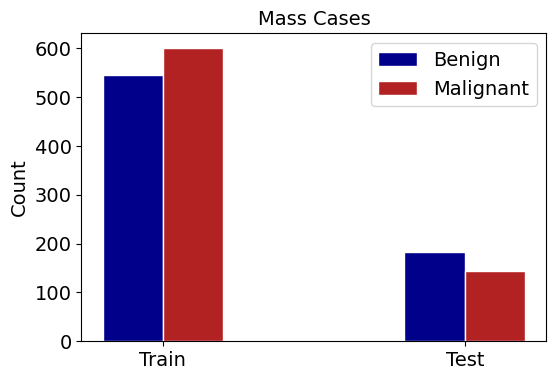

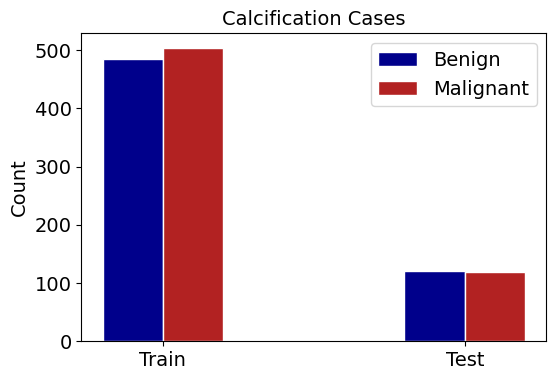

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))

barWidth = 0.2
  
# bars1 = [benign_count_mass_train, benign_count_mass_test]
# bars2 = [malignant_count_mass_train, malignant_count_mass_test]

bars1= [count_mass_train['count'][0], count_mass_test['count'][0]]
bars2 = [count_mass_train['count'][1], count_mass_test['count'][1]]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='darkblue', edgecolor='white', width=barWidth, label='Benign')
plt.bar(r2, bars2, color='firebrick', edgecolor='white', width=barWidth, label='Malignant')
 
plt.xticks([r + 0.5*barWidth for r in range(len(bars1))], ['Train', 'Test'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
# plt.ylim(0,350)
plt.title('Mass Cases', fontsize=14)
plt.legend(fontsize=14)
# plt.savefig('../Figures/mass_count.png', bbox_inches='tight', dpi=300)
plt.show()


#############################################################################
fig, ax = plt.subplots(figsize=(6, 4))

barWidth = 0.2
 
bars1= [count_calc_train['count'][0], count_calc_test['count'][0]]
bars2 = [count_calc_train['count'][1], count_calc_test['count'][1]]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='darkblue', edgecolor='white', width=barWidth, label='Benign')
plt.bar(r2, bars2, color='firebrick', edgecolor='white', width=barWidth, label='Malignant')
 
plt.xticks([r + 0.5*barWidth for r in range(len(bars1))], ['Train', 'Test'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)
# plt.ylim(0,350)
plt.title('Calcification Cases', fontsize=14)
plt.legend(fontsize=14)
# plt.savefig('../Figures/calc_count.png', bbox_inches='tight', dpi=300)
plt.show()




#### CC - MLO distribution

In [66]:
df_mass_train, df_mass_test, df_calc_train, df_calc_test = load_dataframes(get_unique_images=True, drop_without_callback=True)

In [68]:
count_mass_train = pd.DataFrame(df_mass_train['image view'].value_counts()).sort_values(by='image view')
count_mass_train = count_mass_train.rename(columns={'index':'image_view','image view':'counts'}).reset_index()
# count_mass_train['count'] = count_mass_train['count'] / count_mass_train['count'].sum()

count_mass_test = pd.DataFrame(df_mass_test['image view'].value_counts()).sort_values(by='image view')
count_mass_test = count_mass_test.rename(columns={'index':'image view','image view':'counts'}).reset_index()
# count_mass_test['count'] = count_mass_test['count'] / count_mass_test['count'].sum() 

count_calc_train = pd.DataFrame(df_calc_train['image view'].value_counts()).sort_values(by='image view')
count_calc_train = count_calc_train.rename(columns={'index':'image view','image view':'counts'}).reset_index()
# count_calc_train['count'] = count_calc_train['count'] / count_calc_train['count'].sum()

count_calc_test = pd.DataFrame(df_calc_test['image view'].value_counts()).sort_values(by='image view')
count_calc_test = count_calc_test.rename(columns={'index':'image view','image view':'counts'}).reset_index()
# count_calc_test['count'] = count_calc_test['count'] / count_calc_test['count'].sum()

count_mass_train

,image view,count
0,CC,540
1,MLO,606


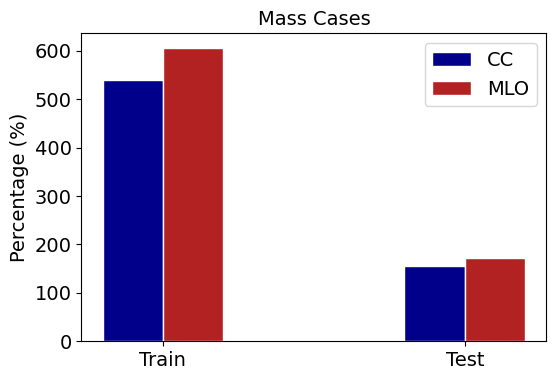

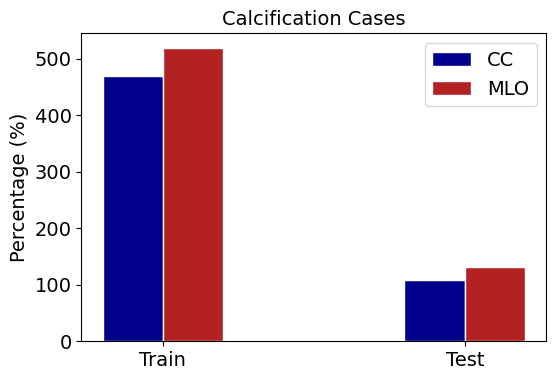

In [69]:
fig, ax = plt.subplots(figsize=(6, 4))

barWidth = 0.2
  
# bars1 = [benign_count_mass_train, benign_count_mass_test]
# bars2 = [malignant_count_mass_train, malignant_count_mass_test]

bars1= [count_mass_train['count'][0], count_mass_test['count'][0]]
bars2 = [count_mass_train['count'][1], count_mass_test['count'][1]]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='darkblue', edgecolor='white', width=barWidth, label='CC')
plt.bar(r2, bars2, color='firebrick', edgecolor='white', width=barWidth, label='MLO')
 
plt.xticks([r + 0.5*barWidth for r in range(len(bars1))], ['Train', 'Test'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
# plt.ylim(0,350)
plt.title('Mass Cases', fontsize=14)
plt.legend(fontsize=14)
# plt.savefig('../Figures/mass_count.png', bbox_inches='tight', dpi=300)
plt.show()


#############################################################################
fig, ax = plt.subplots(figsize=(6, 4))

barWidth = 0.2
 
bars1= [count_calc_train['count'][0], count_calc_test['count'][0]]
bars2 = [count_calc_train['count'][1], count_calc_test['count'][1]]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, color='darkblue', edgecolor='white', width=barWidth, label='CC')
plt.bar(r2, bars2, color='firebrick', edgecolor='white', width=barWidth, label='MLO')
 
plt.xticks([r + 0.5*barWidth for r in range(len(bars1))], ['Train', 'Test'], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
# plt.ylim(0,350)
plt.title('Calcification Cases', fontsize=14)
plt.legend(fontsize=14)
# plt.savefig('../Figures/calc_count.png', bbox_inches='tight', dpi=300)
plt.show()

### Left - Right distribution

In [91]:
df_calc, df_mass = load_dataframes(get_unique_images=True, drop_without_callback=True, total=True)

In [92]:
count_mass = pd.DataFrame(df_mass['left or right breast'].value_counts()).sort_values(by='left or right breast')
count_mass = count_mass.rename(columns={'index': 'left or right breast', 'left or right breast':'counts'}).reset_index()

count_calc = pd.DataFrame(df_calc['left or right breast'].value_counts()).sort_values(by='left or right breast')
count_calc = count_calc.rename(columns={'index': 'left or right breast', 'left or right breast':'counts'}).reset_index()

count_mass

,left or right breast,count
0,LEFT,715
1,RIGHT,758


### Image Size & Pixel Value Analysis

1. Unfortunately, the 'cropped image' directories also contain the masked images, hence I first want to remove those.
2. I will do so by looking at the ratio between zero valued pixels and nonzero valued pixels
3. Conclusion: ratio between zero valued pixels and nonzero valued pixel is always < 1 for masked images:

In [280]:
df_calc, df_mass = load_dataframes(get_unique_images=True, drop_without_callback=True, total=True)
df_calc.head(2)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....


In [ ]:
def pixel_ratio_analysis(df):

    ratiolist = []
    for i in range(len(df)):
        
        img_dir_path = df['cropped image file path'][i]
        img_dir_path = img_dir_path.split('/')
        img_dir_path = img_dir_path[2]

        image_names = os.listdir(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}')
        for image_name in image_names:
            img = Image.open(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}/{image_name}')
            img = img.resize((227, 227), Image.LANCZOS)
            pixel_values = list(img.getdata())

            zero_pixel = 1
            nonzero_pixel = 1
            for pixel in pixel_values:
                if pixel == 0:
                    zero_pixel += 1
                else:
                    nonzero_pixel += 1

            pixel_ratio = nonzero_pixel / zero_pixel

            ratiolist.append(pixel_ratio)
    return pd.DataFrame({'pixel_ratios': ratiolist})

df_ratio_mass = pixel_ratio_analysis(df=df_mass)
df_ratio_calc = pixel_ratio_analysis(df=df_calc)

In [ ]:
between = 0
for k in range(len(df_ratio_mass)):
    if df_ratio_mass['pixel_ratios'][k] >= 1 and df_ratio_mass['pixel_ratios'][k] < 2:
        between += 1

print(f'for mass: {between}')

between = 0
for k in range(len(df_ratio_calc)):
    if df_ratio_calc['pixel_ratios'][k] >= 1 and df_ratio_calc['pixel_ratios'][k] < 2:
        between += 1

print(f'for calc: {between}')

In [ ]:
def move_masked_images_from_cropped_directories(df, threshold):

    for i in range(len(df)):
        img_dir_path = df['cropped image file path'][i]
        img_dir_path = img_dir_path.split('/')
        img_dir_path = img_dir_path[2]

        image_names = os.listdir(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}')

        for image_name in image_names:
            source_path = f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}/{image_name}'
            img = Image.open(source_path)
            img = img.resize((227, 227), Image.LANCZOS)

            pixel_values = list(img.getdata())
            zero_pixel = 1
            nonzero_pixel = 1
            for pixel in pixel_values:
                if pixel == 0:
                    zero_pixel += 1
                else:
                    nonzero_pixel += 1

            pixel_ratio = nonzero_pixel / zero_pixel

            if pixel_ratio < threshold:
                destination_path = f'../Data/CBIS-DDSM dataset/masked/{image_name}'
                shutil.move(source_path, destination_path)

move_masked_images_from_cropped_directories(df=df_mass, threshold=1)
move_masked_images_from_cropped_directories(df=df_calc, threshold=1)

In [ ]:
def create_image_size_df_for_full_image(df):

    width_list = []
    height_list = []

    for i in range(len(df)):
        img_dir_path = df['cropped image file path'][i]
        img_dir_path = img_dir_path.split('/')
        img_dir_path = img_dir_path[2]

        image_name = os.listdir(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}')
        img = Image.open(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}/{image_name}')
        width, height = img.size
        width_list.append(width)
        height_list.append(height)

    df_size = pd.DataFrame({'width': width_list,
                            'height': height_list})
    
    return df_size

df_mass_size = create_image_size_df_for_full_image(df=df_mass)
df_calc_size = create_image_size_df_for_full_image(df=df_calc)

    

In [296]:
def create_image_size_df_for_cropped_image(df):

    width_list = []
    height_list = []

    for i in range(len(df)):
        img_dir_path = df['cropped image file path'][i]
        img_dir_path = img_dir_path.split('/')
        img_dir_path = img_dir_path[2]

        image_name = os.listdir(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}')
        if len(image_name) > 0:
            img = Image.open(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}/{image_name[0]}')
            width, height = img.size
            width_list.append(width)
            height_list.append(height)

    df_size = pd.DataFrame({'width': width_list,
                                'height': height_list})
    
    return df_size

../Data/CBIS-DDSM dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.108998325811479398607974727033630566895/1-076.jpg
../Data/CBIS-DDSM dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.62879353212924234910426659083390529775/1-162.jpg


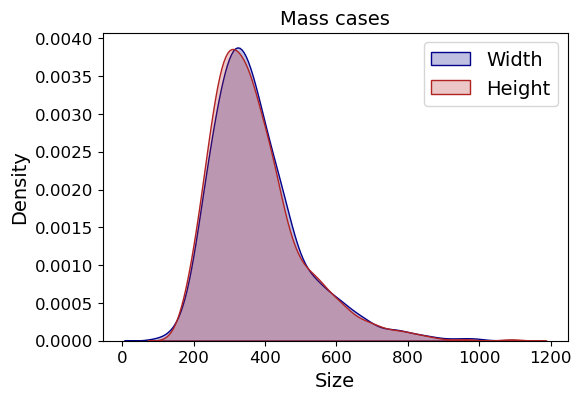

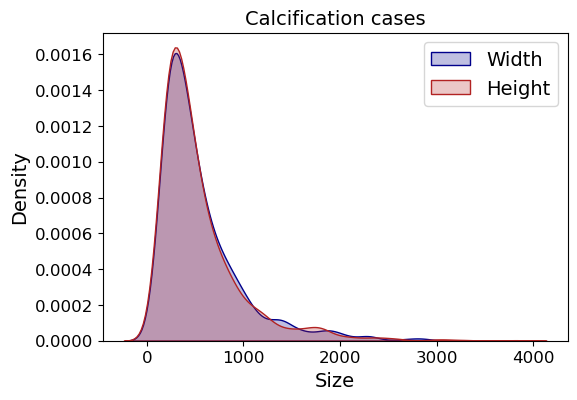

In [303]:
df_mass_size = create_image_size_df_for_cropped_image(df=df_mass)
df_calc_size = create_image_size_df_for_cropped_image(df=df_calc)

plt.figure(figsize=(6,4))
sns.kdeplot(df_mass_size['width'], fill=True, color='darkblue', label='Width')
sns.kdeplot(df_mass_size['height'], fill=True, color='firebrick', label='Height')
plt.legend(fontsize=14)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mass cases', fontsize=14)
plt.savefig('../Figures/mass_size.png', bbox_inches='tight', dpi=300)
plt.show()

plt.figure(figsize=(6,4))
sns.kdeplot(df_calc_size['width'], fill=True, color='darkblue', label='Width')
sns.kdeplot(df_calc_size['height'], fill=True, color='firebrick', label='Height')
plt.legend(fontsize=14)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Calcification cases', fontsize=14)
plt.savefig('../Figures/calc_size.png', bbox_inches='tight', dpi=300)
plt.show()

In [288]:
# outlier detection of width and height
print(f'Largest and smallest width for mass: {df_mass_size.width.min()} - {df_mass_size.width.max()}')
print(f'Largest and smallest height for mass: {df_mass_size.height.min()} - {df_mass_size.height.max()}')
print(f'Largest and smallest width for calc: {df_calc_size.width.min()} - {df_calc_size.width.max()}')
print(f'Largest and smallest height for calc: {df_calc_size.height.min()} - {df_calc_size.height.max()}')

Largest and smallest width for mass: 95 - 1086
Largest and smallest height for mass: 159 - 1099
Largest and smallest width for calc: 81 - 2893
Largest and smallest height for calc: 81 - 3817


In [11]:
# show outliers
img = Image.open(f'../Data/CBIS-DDSM dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.62879353212924234910426659083390529775/1-162.jpg')
# list(img.getdata())

### Pixel value analysis

In [314]:
def create_df_with_all_pixel_values(df):

    all_pixel_values = []

    for i in range(len(df)):
        img_dir_path = df['cropped image file path'][i]
        img_dir_path = img_dir_path.split('/')
        img_dir_path = img_dir_path[2]

        image_name = os.listdir(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}')
        if len(image_name) > 0:
            img = Image.open(f'../Data/CBIS-DDSM dataset/jpeg/{img_dir_path}/{image_name[0]}')
            pixel_values = list(img.getdata())
            all_pixel_values += pixel_values

    return pd.DataFrame({'pixel_values': all_pixel_values})

df_pixel_mass = create_df_with_all_pixel_values(df=df_mass)
df_pixel_calc = create_df_with_all_pixel_values(df=df_calc)

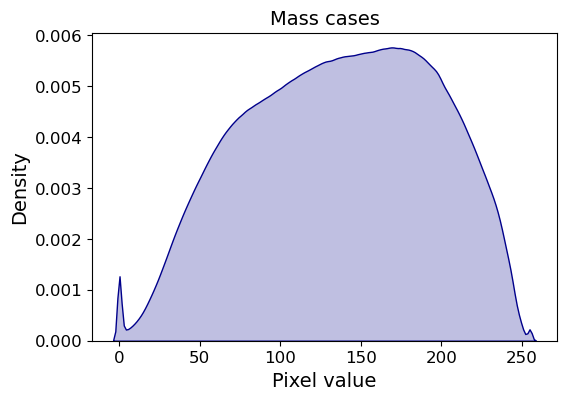

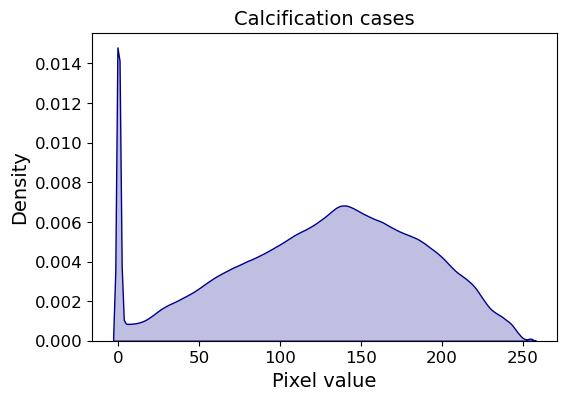

In [315]:
plt.figure(figsize=(6,4))
sns.kdeplot(df_pixel_mass['pixel_values'], fill=True, color='darkblue', label='Pixels')
# sns.kdeplot(df_mass_size['height'], fill=True, color='firebrick', label='Height')
# plt.legend(fontsize=14)
plt.xlabel('Pixel value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Mass cases', fontsize=14)
plt.savefig('../Figures/mass_pixels.png', bbox_inches='tight', dpi=400)
plt.show()

plt.figure(figsize=(6,4))
sns.kdeplot(df_pixel_calc['pixel_values'], fill=True, color='darkblue', label='Pixels')
# sns.kdeplot(df_mass_size['height'], fill=True, color='firebrick', label='Height')
# plt.legend(fontsize=14)
plt.xlabel('Pixel value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Calcification cases', fontsize=14)
plt.savefig('../Figures/calc_pixels.png', bbox_inches='tight', dpi=400)
plt.show()

### Descriptives

In [319]:
df_nonzero_calc = df_pixel_calc[df_pixel_calc['pixel_values'] != 0]
df_nonzero_mass = df_pixel_mass[df_pixel_mass['pixel_values'] != 0]

In [320]:
print('--------------- Calcification (image size) ----------------')
print(df_calc_size.describe())
print('--------------- Mass (image size) ----------------')
print(df_mass_size.describe())
print('--------------- Calcification (with zero pixel values) ----------------')
print(df_pixel_calc.describe())
print('--------------- Mass (with zero pixel values) ----------------')
print(df_pixel_mass.describe())
print('--------------- Calcification (without zero pixel values) ----------------')
print(df_nonzero_calc.describe())
print('--------------- Mass (without zero pixel values) ----------------')
print(df_nonzero_mass.describe())

--------------- Calcification (image size) ----------------
             width       height
count  1227.000000  1227.000000
mean    551.248574   543.418093
std     427.941290   442.388826
min      81.000000    81.000000
25%     265.000000   257.000000
50%     416.000000   405.000000
75%     681.000000   657.000000
max    2893.000000  3817.000000
--------------- Mass (image size) ----------------
             width       height
count  1473.000000  1473.000000
mean    377.451460   372.704005
std     129.324286   127.593244
min      95.000000   159.000000
25%     291.000000   284.000000
50%     352.000000   347.000000
75%     436.000000   427.000000
max    1086.000000  1099.000000
--------------- Calcification (with zero pixel values) ----------------
       pixel_values
count  5.663267e+08
mean   1.267908e+02
std    6.011856e+01
min    0.000000e+00
25%    8.600000e+01
50%    1.330000e+02
75%    1.720000e+02
max    2.550000e+02
--------------- Mass (with zero pixel values) ---------------

### IMPORTANT: the next code requires you to have applied the data preprocessing in notebook "cbis-resnet50.ipynb"

In [48]:
img1 = Image.open('../Data/CBIS-DDSM dataset/base_dir/test/benign/1-218_1.png')
img2 = Image.open('../Data/CBIS-DDSM dataset/base_dir/train/benign/1-011.png')
img3 = Image.open('../Data/CBIS-DDSM dataset/base_dir/test/benign/2-284.png')

img4 = Image.open('../Data/CBIS-DDSM dataset/base_dir/test/malignant/2-022.png')
img5 = Image.open('../Data/CBIS-DDSM dataset/base_dir/test/malignant/2-224.png')
img6 = Image.open('../Data/CBIS-DDSM dataset/base_dir/test/malignant/2-039.png')



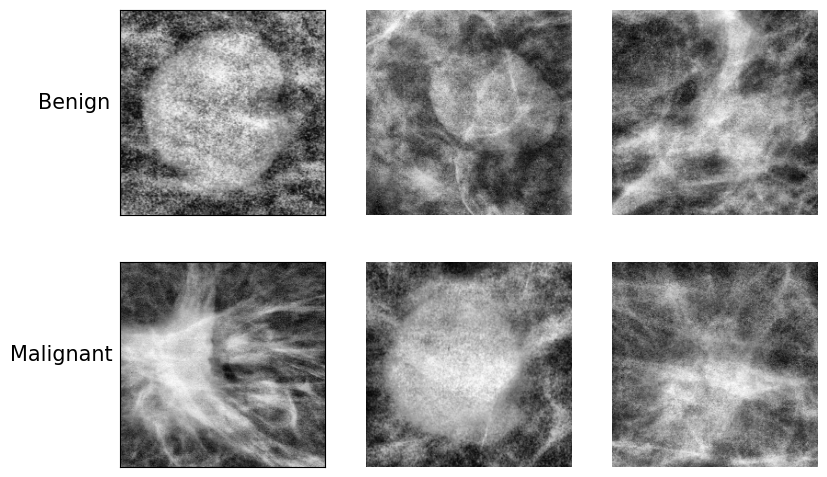

In [52]:
plt.figure(figsize=(9,6))

plt.subplot(2, 3, 1)
plt.imshow(img1)
# plt.axis('off')
plt.ylabel('Benign', fontsize=15, rotation=0, labelpad=33)
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 2)
plt.imshow(img2)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img3)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img4)
# plt.axis('off')
plt.ylabel('Malignant', fontsize=15, rotation=0, labelpad=42)
plt.xticks([])
plt.yticks([])

plt.subplot(2, 3, 5)
plt.imshow(img5)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img6)
plt.axis('off')
# plt.savefig('../Figures/samples.png', dpi=400, bbox_inches='tight')
plt.show()